In [1]:
import numpy as np
import pandas as pd

## 数据勘查及预处理

鸢尾花数据集说明
- SepalLengthCm  花萼长度
- SepalWidthCm  花萼宽度
- PetalLengthCm  花瓣长度
- PetalWidthCm  花瓣宽度
- Species     鸢尾花品种

In [2]:
# 读取数据 - 鸢尾花数据集
data = pd.read_csv(r'../Datasets/iris.csv')

# 数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
# 查看全部数据
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4,4.6,3.1,1.5,0.2,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
8,9,4.4,2.9,1.4,0.2,Iris-setosa


In [4]:
# 删除不需要的Id列
data.drop('Id', axis=1, inplace=True)

# 查看是否有重复记录
data.duplicated().any()

# 删除重复记录
data.drop_duplicates(inplace=True)

In [5]:
# 把类别转换为int型
data['Species'] = data['Species'].map({'Iris-versicolor':0, 'Iris-setosa':1, 'Iris-virginica':2})

# 选取类别为0和1的鸢尾花数据，进行二分类
data = data[data['Species'] != 2]

len(data)

98

## 算法实现

In [10]:
class LogisticRegression:
    
    """初始化
    
    参数：
        alpha: float 学习率
        times: int 迭代次数
    """
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
    
    
    """逻辑函数的实现
    
    参数：
        z: float 自变量，值为 z = w.T * x
    
    返回值：
        p: float 值在[0, 1]之间
        返回样本属于类别1的概率值
        当p >= 0.5(z >= 0)时，判定为类别1， 否则为类别0
    """
    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))
    
    
    """训练
    
    参数：
        X: 待训练的样本数据，类数组类型，形状为[样本数量，特征数量]
        y: 每个样本的目标值（标签），类数组类型，形状为[样本数量]
    """
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        
        # 创建权重的向量，初始值为0，长度比特征值+1 (截距)
        self.w_ = np.zeros(X.shape[1] + 1)
        
        # 创建损失列表，保存每次迭代后的损失值
        self.loss_ = []
        
        # 迭代
        for i in range(self.times):
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            
            # 计算结果判定为1的概率值
            p = self.sigmoid(z)
            
            # 根据逻辑回归的代价函数（目标函数），计算损失值
            # J(w) = -sum(yi * log(s(zi)) + (1 - yi) * log(1 - s(zi))) [i从1到n，n为样本的数量]
            cost = -np.sum(y * np.log(p) + (1 -y) * np.log(1 - p))
            self.loss_.append(cost)
            
            # 根据公式调整权重值：权重（j列） = 权重（j列） + 学习率 * sum((y - s(z)) * x(j))
            self.w_[0] += self.alpha * np.sum(y - p)
            self.w_[1:] += self.alpha * np.dot(X.T, y - p)
            
            
    """预测概率
    
    参数：
        X: 待测试的样本数据，类数组类型，形状[样本数量，特征数量]
        
    返回值：
        result: 预测的结果（概率值），数组类型
    """
    def predict_proba(self, X):
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        p = self.sigmoid(z)
        
        # 将预测结果转换为二维数组，便于后续的拼接
        p = p.reshape(-1, 1)
        
        # 将两个数组进行横向拼接
        return np.concatenate([1-p, p], axis=1)
            
            
    """预测分类
    
    参数：
        X: 待测试的样本数据，类数组类型，形状[样本数量，特征数量]
        
    返回值：
        result: 预测的结果（分类值）,数组类型
    """
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [16]:
# 构建数据集
d1 = data[data['Species'] == 0]
d2 = data[data['Species'] == 1]
d1 = d1.sample(len(d1), random_state=0)
d2 = d2.sample(len(d2), random_state=0)

# 训练集
train_X = pd.concat([d1.iloc[:40, :-1], d2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([d1.iloc[:40, -1], d2.iloc[:40, -1]], axis=0)

# 测试集
test_X = pd.concat([d1.iloc[40:, :-1], d2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([d1.iloc[40:, -1], d2.iloc[40:, -1]], axis=0)

In [18]:
# 鸢尾花的特征列在同一个数量级，因此不需要进行标准化处理
lr = LogisticRegression(alpha=0.01, times=30)
lr.fit(train_X, train_y)

# 预测概率值
# lr.predict_proba(test_X)

# 预测分类值
result = lr.predict(test_X)

# 计算预测的准确率
np.sum((result == test_y) / len(test_y))

1.0

## 数据可视化

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

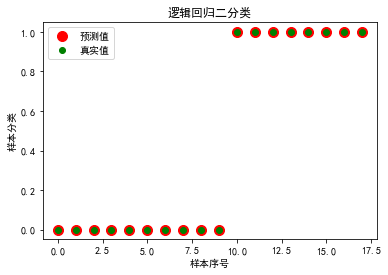

In [20]:
# 绘制预测值
plt.plot(result, 'ro', ms=10, label='预测值')

# 绘制真实值
plt.plot(test_y.values, 'go', label='真实值')

plt.title('逻辑回归二分类')
plt.xlabel('样本序号')
plt.ylabel('样本分类')
plt.legend()
plt.show()

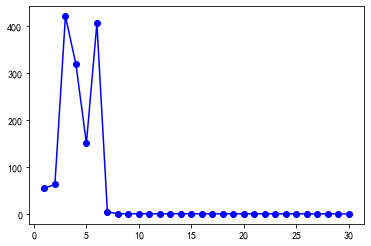

In [21]:
# 绘制目标函数的损失值
plt.plot(range(1, lr.times + 1), lr.loss_, 'bo-')